In [43]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Input,  Dense, Embedding, Flatten

In [44]:
from tensorflow.keras.models import Model

In [45]:
from tensorflow.keras.utils import plot_model

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
from tensorflow.keras.layers import Subtract, Concatenate

In [48]:
season = pd.read_csv('/content/games_season.csv')

In [49]:
tourney = pd.read_csv('/content/games_tourney.csv')

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
season_train, season_test, _,_ =train_test_split(season, season, test_size=0.2)

In [52]:
unique= np.unique(season['team_1']).shape[0]

In [53]:
input = Input(shape=(1,))

In [54]:
embed_layer = Embedding(input_dim=unique, input_length=1, output_dim=1)(input)

In [55]:
embed_flat = Flatten()(embed_layer)

In [56]:
embed_model = Model(input, embed_flat)

In [57]:
team_1 = Input(shape=(1,))

In [58]:
team_2 = Input(shape=(1,))

In [59]:
strength_t1 = embed_model(team_1)
strength_t2 = embed_model(team_2)

In [60]:
subtract_layer = Subtract()([strength_t1, strength_t2])

In [61]:
Output = Dense(1)(subtract_layer)

In [62]:
model = Model([team_1, team_2], Output)

In [63]:
model.compile('adam', 'mean_absolute_error')

In [64]:
model.fit([season_train['team_1'], season_train['team_2']], season_train['score_diff'], epochs=1, batch_size=2000, validation_split=0.2, verbose=0)

In [65]:
model.evaluate([season_test['team_1'], season_test['team_2']], season_test['score_diff'], verbose=0)

12.080012321472168

In [66]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 model_5 (Functional)           (None, 1)            10888       ['input_9[0][0]',                
                                                                  'input_10[0][0]']               
                                                                                                  
 subtract_2 (Subtract)          (None, 1)            0           ['model_5[0][0]',          

In [67]:
input_team1 = Input(shape=(1,))

Wir erstellen nun ein Modell mit3 Inputs und führen den 

In [68]:
input_team2= Input(shape=(1,))

In [69]:
input_home = Input(shape=(1,))

In [70]:
strength_t1= embed_model(input_team1)

In [71]:
strength_t2= embed_model(input_team2)

In [72]:
concat = Concatenate()([strength_t1, strength_t2, input_home])

In [73]:
Output = Dense(1)(concat)

In [74]:
model_3 = Model([input_team1, input_team2, input_home], Output)

In [75]:
model_3.compile('adam', 'mean_absolute_error')

In [76]:
model_3.fit([season_train['team_1'], season_train['team_2'], season_train['home']], season_train['score_diff'], epochs=1, batch_size=2000, verbose=False)

In [77]:
model_3.evaluate([season_test['team_1'], season_test['team_2'], season_test['home']], season_test['score_diff'], verbose=False)

12.057296752929688

In [78]:
model_3.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 model_5 (Functional)           (None, 1)            10888       ['input_11[0][0]',               
                                                                  'input_12[0][0]']               
                                                                                                  
 input_13 (InputLayer)          [(None, 1)]          0           []                         

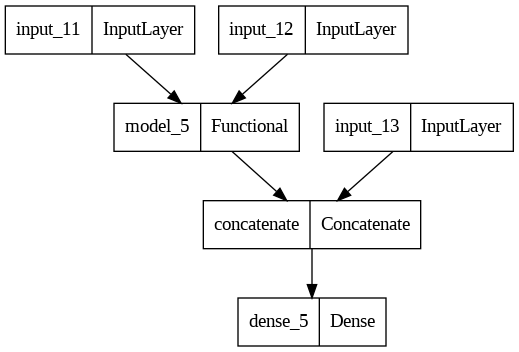

In [79]:
plot_model(model_3)

Nun stacken wir Modelle. Wir nutzen das erste Modell mit den 2 Teams als Inputs und 'home' und erstellen PRedictions. Diese Bauen wir in diesem Modell ein und Predicten damit die Score differenz oder wer gewinnt

In [85]:
tourney['pred'] = model_3.predict([tourney['team_1'], tourney['team_2'], tourney['home']])

133/133 [==============================] - 1s 5ms/step


In [86]:
tourney.columns

Index(['season', 'team_1', 'team_2', 'home', 'seed_diff', 'score_diff',
       'score_1', 'score_2', 'won', 'pred'],
      dtype='object')

In [87]:
tourney.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won,pred
0,1985,288,73,0,-3,-9,41,50,0,0.051953
1,1985,5929,73,0,4,6,61,55,1,-0.023578
2,1985,9884,73,0,5,-4,59,63,0,0.075784
3,1985,73,288,0,3,9,50,41,1,-0.003070
4,1985,3920,410,0,1,-9,54,63,0,-0.021163


In [88]:
tourney_train, tourney_test, _,_= train_test_split(tourney, tourney, test_size=0.1)

In [89]:
tourney_train.head(2)

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won,pred
26,1985,3745,3234,0,-1,-8,53,61,0,0.111216
263,1987,5447,1518,0,-9,5,65,60,1,-0.019434


In [90]:
tourney_test.columns

Index(['season', 'team_1', 'team_2', 'home', 'seed_diff', 'score_diff',
       'score_1', 'score_2', 'won', 'pred'],
      dtype='object')

In [91]:
tourney_test.head(2)

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won,pred
2119,2001,9577,8591,0,-15,-29,60,89,0,-0.044284
606,1989,8029,8579,0,-11,2,80,78,1,-0.058382


In [92]:
input_stack = Input(shape=(3,))

In [93]:
out_tens = Dense(1)(input_stack)

In [94]:
model_4 = Model(input_stack, out_tens)

In [95]:
model_4.compile('adam', 'mean_absolute_error')

In [96]:
model_4.fit(tourney_train[['home', 'seed_diff', 'pred']], tourney_train['score_diff'], epochs=15, validation_split=0.1, verbose=0)

In [97]:
model_4.evaluate(tourney_test[['home', 'seed_diff', 'pred']], tourney_test['score_diff'])

14/14 [==============================] - 0s 2ms/step - loss: 10.2405


10.240513801574707

Nun können wir 2 Outputs predicten. Wir können die 3 Inputs nutzen um die score differenz zu predicten und mit dieser dann die Win/Loss Wahrscheinlichket voraussagen

In [98]:
input_5 = Input(shape=(3,))

In [99]:
Predict_scorediff = Dense(1)(input_5)

In [100]:
Predict_win = Dense(1,activation='sigmoid')(Predict_scorediff)

In [101]:
model_5 = Model(input_5, [Predict_scorediff, Predict_win])

In [102]:
model_5.compile(optimizer='adam', loss=['mean_absolute_error', 'binary_crossentropy'])

In [103]:
tourney_train.head(1)

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won,pred
26,1985,3745,3234,0,-1,-8,53,61,0,0.111216


In [104]:
tourney_train.columns

Index(['season', 'team_1', 'team_2', 'home', 'seed_diff', 'score_diff',
       'score_1', 'score_2', 'won', 'pred'],
      dtype='object')

In [105]:
model_5.fit(tourney_train[['home', 'seed_diff', 'pred']], [tourney_train['score_diff'], tourney_train['won']],epochs=10, verbose=False, validation_split=0.1)

In [106]:
model_5.evaluate(tourney_test[['home', 'seed_diff', 'pred']], [tourney_test['score_diff'], tourney_test['won']], verbose=0)

[11.72459602355957, 10.88736629486084, 0.837228536605835]

In [107]:
model_5.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [108]:
model_5.get_weights()

[array([[1.1125184 ],
        [0.19708101],
        [0.14630897]], dtype=float32),
 array([-0.02659981], dtype=float32),
 array([[-0.31796178]], dtype=float32),
 array([-0.02051023], dtype=float32)]

In [116]:
input6 = Input(shape=(1,))

In [117]:
Output6 = Dense(2)(input6)

In [111]:
model6 = Model(input6, Output6)

In [112]:
model6.compile('adam', 'mean_absolute_error')

In [121]:
hist6 = model6.fit(tourney_train['seed_diff'], tourney_train[['score_1', 'score_2']], epochs=100, validation_split=0.15, verbose=0)

In [122]:
model6.evaluate(tourney_test['seed_diff'], tourney_test[['score_1', 'score_2']], verbose=0)

12.445756912231445

In [123]:
model6.get_weights()

[array([[ 0.5526525, -0.5569267]], dtype=float32),
 array([60.81498 , 60.795288], dtype=float32)]

In [124]:
input7 = Input((2,))

In [126]:
Output_reg = Dense(1)(input7)

In [127]:
Output_clas= Dense(1, activation='sigmoid')(Output_reg)

In [128]:
model7 = Model(input7, [Output_reg, Output_clas])

In [129]:
model7.compile('adam', loss=['mean_absolute_error', 'binary_crossentropy'])

In [132]:
model7.fit(tourney_train[['seed_diff', 'pred']], [tourney_train['score_diff'], tourney_train['won']], epochs=200, validation_split=0.2, batch_size=500, verbose=0)

In [135]:
model7.evaluate(tourney_test[['seed_diff', 'pred']], [tourney_test['score_diff'], tourney_test['won']], verbose=0)

[9.648039817810059, 9.085745811462402, 0.5622948408126831]

In [136]:
model7.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


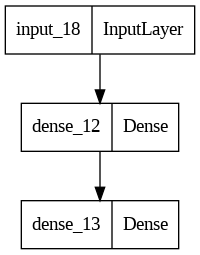

In [137]:
plot_model(model7)

In [138]:
model7.get_weights()

[array([[1.1595854 ],
        [0.94986314]], dtype=float32),
 array([-0.01563049], dtype=float32),
 array([[0.14624174]], dtype=float32),
 array([-0.0015123], dtype=float32)]

In [144]:
model7.predict(tourney_test[['seed_diff', 'pred']][:2])

1/1 [==============================] - 0s 43ms/step


[array([[-17.451475],
        [-12.826525]], dtype=float32), array([[0.07218191],
        [0.13270096]], dtype=float32)]

In [146]:
tourney_test[:2]

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won,pred
2119,2001,9577,8591,0,-15,-29,60,89,0,-0.044284
606,1989,8029,8579,0,-11,2,80,78,1,-0.058382
